In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import matplotlib
from cvxopt import matrix
from cvxopt import solvers
from numpy import linalg as LA
import gzip, pickle
from keras.datasets import mnist
from PIL import Image
import cv2
import copy
from matplotlib.pyplot import imshow
(trainX, trainy), (testX, testy) = mnist.load_data()

Using TensorFlow backend.


In [2]:
def rotate_image(image, angle):
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [114]:
def rotation_deritavtive(x):
    h,w = x.shape
    delta = 15
    M1 = cv2.getRotationMatrix2D(((w-1)/2.0,(h-1)/2.0), -delta, 1)
    M2 = cv2.getRotationMatrix2D(((w-1)/2.0,(h-1)/2.0), delta, 1)
    return ((cv2.warpAffine(x, M1, (w,h)) - cv2.warpAffine(x, M2, (w,h))) / delta*2).reshape(x.shape[0]*x.shape[-1], 1)

In [115]:
def one_side_min_tangent_dist(x1, dx1, x2, learning_rate=0.0005, max_iter=5000, delta=0.0001):
    d, r = dx1.shape
    a = np.random.random((r,1))
    t = 0
    while True:
        b = copy.copy(a)
        a = a - learning_rate * np.dot((x1 + np.dot(dx1, a) - x2).T, dx1)
        t += 1
        if np.sqrt(np.mean((b-a)**2)) < delta or t > max_iter:
            break
    return np.sqrt(np.mean((x1 + np.dot(dx1, a) - x2)**2)) 

In [141]:
def tangent_dist(x1, x2):
    dx1 = rotation_deritavtive(x1)
    dx2 = rotation_deritavtive(x2)
    x1 = x1.reshape(x1.shape[0]*x1.shape[-1], 1)
    x2 = x2.reshape(x2.shape[0]*x2.shape[-1], 1)
    d1s_x1_x2 = one_side_min_tangent_dist(x1, dx1, x2)
    d1s_x2_x1 = one_side_min_tangent_dist(x2, dx2, x1)
    return np.sqrt(1/2 * (d1s_x1_x2**2 + d1s_x2_x1**2))

In [160]:
x = trainX[12]
xr = rotate_image(x, -15)
img = Image.fromarray(xr)
img

In [161]:
img = Image.fromarray(x)
img

In [162]:
x = x/255
xr = xr/255
tangent_dist(x, xr)

0.1639219225025942

In [163]:
np.sqrt(np.mean((x - xr)**2))

0.240694699320934

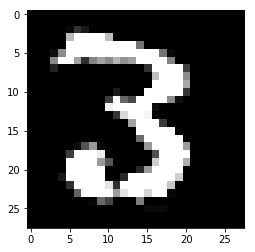

In [164]:
p = rotation_deritavtive(x)
p = p.reshape(28, 28)
p = x*255 + 30*p*255

img = Image.fromarray(p)
img = img.convert('RGB')
imshow(img)

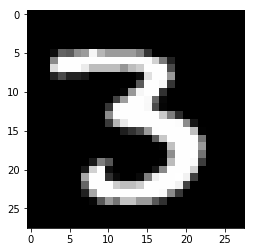

In [165]:
img = Image.fromarray(x*255)
img = img.convert('RGB')
imshow(img)